In [1]:
import os
import tweepy as tw
import numpy as np
import pandas as pd
import re ## it used to work on String
import nltk # text mining
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Twitter Developer Login
consumer_key = "5dE7WjUGbjwJFxz6DURobGwnK"
consumer_secret = "OjbwMuEKaZLORPE763KxmevMf01yEelXPlimLAEUtV04q7ZAa7"
access_token = "1331301193637715969-vqefUL8AQyZilMmUFYcDXQJdpU4B7y"
access_token_secret = "goA2q71O3TLgrcyjRubK40Lo848Y07rQax9tYWmnRFcED"

In [3]:
try:
     # create OAuthHandler object
    auth = OAuthHandler(consumer_key, consumer_secret)
     # set access token and secret
    auth.set_access_token(access_token, access_token_secret)
     # create tweepy API object to fetch tweets
    api = tw.API(auth, wait_on_rate_limit=True)
except:
    print("Error: Authentication Failed")

In [4]:
# Collect tweets
search_words = "AmazonIndia"
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",since='2019-12-01').items(3000)

# Collect a list of tweets
[tweet.text for tweet in tweets]

['Hey @amazonIN pls stop "leaking" my contact data 2 ut vendors. We don\'t like #hampers4reviews\nI\'m pretty sure your… https://t.co/qk3r9JNSEk',
 'I played #AmazonQuiz on #AmazonIndia and eligible for lucky draw... hope to be on the wining list.. https://t.co/vWE5RalXRV',
 'RT @IndiaAnker: Spot the incorrect feature of #EufybyAnker #Robovac11S \n\n#supersaturday #housecleaning #floorcleaning #eufy #AnkerIndia #An…',
 '#AmazonIndia #AmazonHelp - Wrong &amp; Old product delivered for order # 403-1168897-0451530 Dell P2219H 22 Inch.  Rqst… https://t.co/5lHqaLn9Ed',
 '@amazonIN  Buy in 2 hours and get the phone next day or today it said and post order shows delivery next week!\nWhen… https://t.co/I15QQwmszw',
 'Complete ergonomic solutions, now available on @amazon India\n\nShop now at https://t.co/OIXGpHLVun\n\n#ergonomics… https://t.co/auPHH4MCSe',
 'RT @GulabSingh9891: Please Give me One Chance to Stand and Win this Quiz !!🙏🏻\n#AmazonQuiz #FunZone \n#DailyMorningQuizTimeWithAmazon\n#Q

In [5]:
import twitter

In [6]:
auth = twitter.oauth.OAuth(access_token, access_token_secret,
                           consumer_key, consumer_secret)
 
twitter_api = twitter.Twitter(auth=auth)

# http://woeid.rosselliot.co.nz/lookup/india   ##23424848  # 2295411
INDIA_WOE_ID = 23424848


# https://developer.twitter.com/en/docs/trends/trends-for-location/api-reference/get-trends-place
india_trends = twitter_api.trends.place(_id=INDIA_WOE_ID)

In [7]:
for trending in india_trends[0]['trends']:
    print(trending['name'], '-----' , trending['tweet_volume'])

#GHMCResults ----- 16032
#IndianNavyDay ----- 17082
#GHMCElectionresults ----- None
#GHMCElections ----- None
#Bhagyanagar ----- None
भारतीय नौसेना ----- 12755
Postal ----- 20859
T20I ACTION ON SONY TEN ----- None
VOTE FOR RAHUL VAIDYA ----- None
Ballot ----- 254493
Operation Trident ----- None
Karachi ----- None
Happy Birthday Sir ----- None
shawn ----- 267007
EVMs ----- None
Solapur ----- None
RBI Governor ----- None
Kid of the Year ----- 10956
Nagpur ----- None
West Indies ----- None
Singh ji Insan ----- None
heather ----- 72230
Saint Dr. ----- None
Bilkis ----- 13728
Meditation ----- 26092
#कल_किसानों_का_भारतबंद_रहेगा ----- 31644
#fridaymorning ----- None
#CBILiable4SSRJustice ----- 60543
#भाग्यनगर_मे_भगवाधारी ----- None
#HyderabadElection ----- None
#FarmersAreLifeLine ----- 22559
#FridayThoughts ----- None
#भारतीय_नौसेना_दिवस ----- None
#DiljitVsKangana ----- None
#DiljitDestroysKangana ----- None
#KaneWilliamson ----- None
#AtrangiRe ----- None
#TabooWithrealme ----- None
#RBIPo

In [8]:
new_search = "AmazonIndia  -filter:retweets"

tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",since='2019-12-01').items(3000)

In [9]:
users_locs = [[tweet.user.screen_name, tweet.user.location,tweet.source,tweet.place,tweet.created_at,tweet.user.geo_enabled,tweet.user.friends_count,tweet.text,tweet.retweet_count,tweet.retweeted] for tweet in tweets]

In [10]:
tweet_text1 = pd.DataFrame(data=users_locs, 
                    columns=['user', "location","source","place","created_at","geo_enabled","friends_count",
                             "text","retweet_count","retweeted_status"])
tweet_text1

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,its_vin,"ÜT: 19.10867,72.839153",Twitter for Android,None,2020-12-04 06:42:56,True,208,"Hey @amazonIN pls stop ""leaking"" my contact da...",0,False
1,anupam92biswas,,Twitter for Android,None,2020-12-04 06:24:52,False,3,I played #AmazonQuiz on #AmazonIndia and eligi...,0,False
2,ketulpatel_,Vadodara,Twitter Web App,None,2020-12-04 05:41:33,True,40,#AmazonIndia #AmazonHelp - Wrong &amp; Old pro...,0,False
3,AGRAJ1,"Chennai, India",Twitter for Android,None,2020-12-04 05:28:52,False,80,@amazonIN Buy in 2 hours and get the phone ne...,0,False
4,SCube_Ergonomic,Bangalore,Twitter Web App,None,2020-12-04 05:16:03,False,7,"Complete ergonomic solutions, now available on...",0,False
5,KNYAMed,"Mumbai, India",Twitter for Android,None,2020-12-04 05:02:25,False,15,We're excited to announce that we're now on #A...,0,False
6,Pizzazz_Books,South Africa,The Social Jukebox,None,2020-12-04 04:21:21,False,14195,When HISTORY and ROMANCE are all rolled into o...,1,False
7,Gajanan03140450,Pune,Twitter for Android,None,2020-12-04 03:31:23,False,74,#AmazonIndia\n#AmazonQuiz\n#AmazonFunzoneSlots...,0,False
8,Gajanan03140450,Pune,Twitter for Android,None,2020-12-04 03:30:20,False,74,#AmazonIndia\n#AmazonQuiz\n@amazonIN\n@AmitAga...,0,False
9,Gajanan03140450,Pune,Twitter for Android,None,2020-12-04 03:30:00,False,74,#AmazonIndia\n#AmazonQuiz\n@amazonIN\n@AmitAga...,0,False


In [11]:
tweet_text1.shape

(51, 10)

In [12]:
data=pd.DataFrame(tweet_text1.text)
data.head()

,text
0,"Hey @amazonIN pls stop ""leaking"" my contact da..."
1,I played #AmazonQuiz on #AmazonIndia and eligi...
2,#AmazonIndia #AmazonHelp - Wrong &amp; Old pro...
3,@amazonIN Buy in 2 hours and get the phone ne...
4,"Complete ergonomic solutions, now available on..."


In [13]:
data.iloc[0,0]

'Hey @amazonIN pls stop "leaking" my contact data 2 ut vendors. We don\'t like #hampers4reviews\nI\'m pretty sure your… https://t.co/qk3r9JNSEk'

In [14]:
data.iloc[3,0]

'@amazonIN  Buy in 2 hours and get the phone next day or today it said and post order shows delivery next week!\nWhen… https://t.co/I15QQwmszw'

## To remove the Ascent letter

In [15]:
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}

In [16]:
data['text'] = (data['text'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space
                              .replace(characterMap, regex=True) ### used to find pattern n replace
                              .str.normalize('NFKD') ### never skip the letter
                              .str.encode('ascii', errors='ignore') # convert in programming language & not readable for human
                              .str.decode('utf-8')) # is to convert into read able format for machine & human

In [17]:
data.iloc[2,0]

'#AmazonIndia #AmazonHelp - Wrong &amp; Old product delivered for order # 403-1168897-0451530 Dell P2219H 22 Inch.  Rqst... https://t.co/5lHqaLn9Ed'

## Convert to Lower

In [18]:
data.text=data.text.str.lower()

In [19]:
data.iloc[0,0]

'hey @amazonin pls stop "leaking" my contact data 2 ut vendors. we don\'t like #hampers4reviews\ni\'m pretty sure your... https://t.co/qk3r9jnsek'

In [20]:
data.iloc[3,0]

'@amazonin  buy in 2 hours and get the phone next day or today it said and post order shows delivery next week!\nwhen... https://t.co/i15qqwmszw'

## Removing Url

S = is used to find the http & www. without space  replaced with blank  

In [21]:
data['text'] = data['text'].str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[0,0]

'hey @amazonin pls stop "leaking" my contact data 2 ut vendors. we don\'t like #hampers4reviews\ni\'m pretty sure your... '

# Remove punctuation

In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [24]:
data['text']=data['text'].apply(lambda x : remove_punctuation(x))

In [25]:
data.iloc[0,0]

'hey amazonin pls stop leaking my contact data 2 ut vendors we dont like hampers4reviews\nim pretty sure your '

In [26]:
data.iloc[3,0]

'amazonin  buy in 2 hours and get the phone next day or today it said and post order shows delivery next week\nwhen '

In [27]:
data.iloc[2,0]

'amazonindia amazonhelp  wrong amp old product delivered for order  40311688970451530 dell p2219h 22 inch  rqst '

## Remove Number

d = Returns a match where the string contains digits (numbers from 0-9)

In [28]:
data['text'] = data['text'].str.replace('\d+', '')

In [29]:
data.iloc[0,0]

'hey amazonin pls stop leaking my contact data  ut vendors we dont like hampersreviews\nim pretty sure your '

## Removing Stop Words

In [30]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TERMINATOR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [32]:
data.iloc[0,0]

'hey amazonin pls stop leaking contact data ut vendors dont like hampersreviews im pretty sure'

In [33]:
data.iloc[3,0]

'amazonin buy hours get phone next day today said post order shows delivery next week'

In [34]:
data.iloc[2,0]

'amazonindia amazonhelp wrong amp old product delivered order dell ph inch rqst'

# Replace the similar code 

In [35]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\TERMINATOR\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [36]:
words = set(nltk.corpus.words.words())

In [37]:
words

{'scholarch',
 'scram',
 'unadmonished',
 'stouten',
 'ascocarpous',
 'lexicographer',
 'lache',
 'Roridula',
 'Didelphidae',
 'epidermical',
 'monosyllabize',
 'quodlibet',
 'uncorrugated',
 'lazyhood',
 'sinneress',
 'toponymic',
 'unreproducible',
 'springingly',
 'mootstead',
 'ascending',
 'preboil',
 'bewilderment',
 'pitiably',
 'Idist',
 'dithioic',
 'Hoplonemertea',
 'angiokinesis',
 'untranquil',
 'courteously',
 'combinator',
 'precloacal',
 'entemple',
 'recoverableness',
 'asymptotical',
 'triconch',
 'outvie',
 'sighted',
 'anticrochet',
 'rendering',
 'flowerist',
 'singler',
 'venality',
 'birr',
 'unsanctity',
 'preromanticism',
 'superdivine',
 'Columellia',
 'fasten',
 'easterling',
 'knut',
 'radioscopical',
 'epipaleolithic',
 'knolly',
 'boatlip',
 'kerbstone',
 'tinger',
 'uredostage',
 'clout',
 'notal',
 'bloodshot',
 'Sharra',
 'koila',
 'counterhypothesis',
 'opopanax',
 'maniacal',
 'slowdown',
 'ulnar',
 'underescheator',
 'earnestness',
 'unadvancing',
 'S

In [38]:
text=data.text[0]
text

'hey amazonin pls stop leaking contact data ut vendors dont like hampersreviews im pretty sure'

In [39]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('lockdowneffect|lockdown', '', text)  ## Remove common words
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) # search for single letter then replace
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # search for combination of capital or small of 2 digit then replace  
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())  # vlookup for checking alphabet    text =  re.sub(r' +', ' ',text) # #Check if the string has any + characters
    return text

round2 = lambda x: clean_text_round2(x)

In [40]:
# Let's take a look at the updated text
data = pd.DataFrame(data.text.apply(round2))
data.iloc[0,0]

'hey stop contact data dont like pretty sure'

# lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

In [41]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer() # to extract the tokens from string of words or sentences without whitespaces,
lemmatizer  = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [42]:
data.head()

,text
0,hey stop contact data dont like pretty sure
1,eligible lucky draw hope list
2,wrong old product order dell inch
3,buy get phone next day today said post order d...
4,complete available shop


In [43]:
data['text'] = data.text.apply(lemmatize_text)
data.head()

,text
0,"[hey, stop, contact, data, dont, like, pretty,..."
1,"[eligible, lucky, draw, hope, list]"
2,"[wrong, old, product, order, dell, inch]"
3,"[buy, get, phone, next, day, today, said, post..."
4,"[complete, available, shop]"


In [44]:
data['text'] = data.text.apply(' '.join)
data.head()

,text
0,hey stop contact data dont like pretty sure
1,eligible lucky draw hope list
2,wrong old product order dell inch
3,buy get phone next day today said post order d...
4,complete available shop


### Strip extra whitespace

In [45]:
data['text'] = (data['text'].astype("str")
                              .str.rstrip())
data.head()

,text
0,hey stop contact data dont like pretty sure
1,eligible lucky draw hope list
2,wrong old product order dell inch
3,buy get phone next day today said post order d...
4,complete available shop


### Document-Term Matrix

In [46]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.text) # matrix 
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # dataframe
# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
accepted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alkaline,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
announce,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
tdm['freq'] = tdm.sum(axis=1)

In [48]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,freq
0,accepted,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,agar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,alkaline,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,alp,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,announce,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)

C:\Users\TERMINATOR\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\TERMINATOR\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
tdm1.head(20)

,Word,freq
153,win,11
41,discount,7
60,hope,6
20,chance,5
131,stand,5
36,day,5
108,quiz,5
12,bass,4
74,mail,4
38,deep,3


In [51]:
w = tdm1[tdm1['freq'] >=20] 
w

,Word,freq


In [52]:
#import seaborn as sns
#fg = sns.factorplot(x='Word', y='freq',
                        #size=6,  aspect=2,
                        #kind='bar', 
                        #data=w)

In [53]:
text=data.text[3]
text

'buy get phone next day today said post order delivery next week'

In [54]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1639 words in the combination of all review.


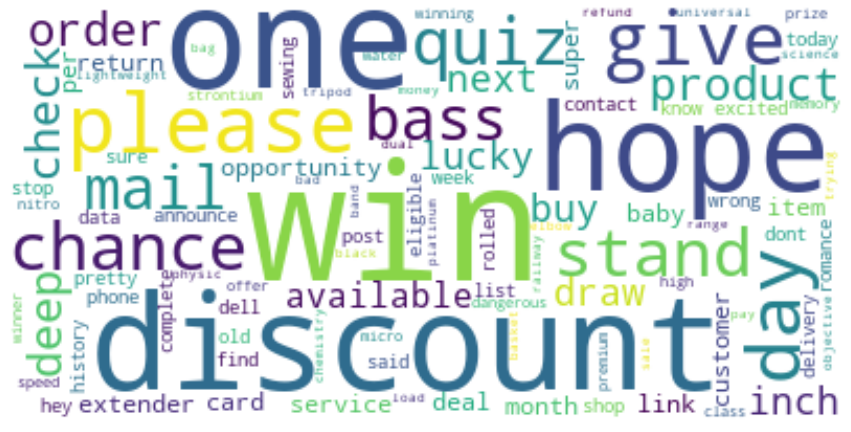

In [55]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(background_color="white",max_words=100,collocations=False).generate(text)
plt.figure(figsize=[15,27])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [56]:
new_search = "Flipkart"
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",since='2020-04-01').items(3000)

# Collect a list of tweets
[tweet.text for tweet in tweets]

['@IndiaTodayTech @IndiaTodayFLASH Any other better source to buy other than @Flipkart ?',
 'HP Laptop 15s-du1065TU i5|10th Gen|4GB|512GBSSD+32GB Optane|15.6 inch|W10H|INT Graphics|Jet Black\n\n10 % off with AM… https://t.co/YQmqN1IL5B',
 'RT @AP_Skill: #Press clipping Regarding @AP_Skill  #Flipkart  \nSamarth e- platform. https://t.co/vhgPKoqAWq',
 "@Biswaji82911020 @Flipkart @stufflistings @thetymonbay @8ap @SamsungIndia I think Samsung M51 Sells On Amazon..Maybe that's the reason",
 'I had order phone in diwali sale at 9411.. now the current price is around 15k..\nMy amount of 9441 was blocked for… https://t.co/BDZSVIEGvQ',
 '@stufflistings @Biswaji82911020 @Flipkart @AmreliaRuhez @thetymonbay @8ap @SamsungIndia If they put m51 then there… https://t.co/s7S1RxRvAJ',
 "@ArishShah Sorry to hear about this. We'd request you to contact Flipkart Travel desk at travelhelp@flipkart.com or… https://t.co/z8CJm7Unhj",
 '80% Off on Celio\xa0Men Slim Fit Checkered Casual Shirt Starts from Rs. 43

In [59]:
new_search = "Flipkart  -filter:retweets"

tweets_1 = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",since='2020-04-01').items(3000)

In [60]:
users_locs_1 = [[tweet.user.screen_name, tweet.user.location,tweet.source,tweet.place,tweet.created_at,tweet.user.geo_enabled,tweet.user.friends_count,tweet.text,tweet.retweet_count,tweet.retweeted] for tweet in tweets_1]

In [61]:
tweet_text2 = pd.DataFrame(data=users_locs_1, 
                    columns=['user', "location","source","place","created_at","geo_enabled","friends_count",
                             "text","retweet_count","retweeted_status"])
tweet_text2

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,Amit52752025,"New Delhi, India",Twitter for Android,Place(_api=<tweepy.api.API object at 0x000001C...,2020-12-04 07:29:43,True,7,BY The Way You Are Delivering Me This Product ...,0,False
1,Amit52752025,"New Delhi, India",Twitter for Android,Place(_api=<tweepy.api.API object at 0x000001C...,2020-12-04 07:29:42,True,7,@Flipkart\nI've Ordered Milton Kool Rover 22 F...,0,False
2,ChandraShekh_ar,,Twitter for Android,None,2020-12-04 07:29:33,False,48,@Flipkart can you help me on Order OD120326443...,0,False
3,flipkartsupport,India,SocialCS Flipkart,None,2020-12-04 07:29:32,False,18,@yogendr29027392 To ensure that your Flipkart ...,0,False
4,NfaPost,"Bengaluru, India",Twitter Web App,None,2020-12-04 07:29:27,False,41,Flipkart Launches 2GUD Local To Onboard Offlin...,0,False
...,...,...,...,...,...,...,...,...,...,...
2995,DharyaP,,Twitter Web App,None,2020-12-03 01:17:16,False,1,"Flipkart Fake or Not quiz answers October 25, ...",0,False
2996,Devashish711,,Twitter for Android,None,2020-12-03 01:12:41,False,116,@SureshMali_ @narendramodi @nstomar @icarindia...,0,False
2997,NadeemK62024288,"मुंबई, भारत",Twitter for Android,None,2020-12-03 01:06:00,False,16,@avirat20 @Flipkart And it has 5G network conn...,0,False
2998,NadeemK62024288,"मुंबई, भारत",Twitter for Android,None,2020-12-03 01:02:04,False,16,@avirat20 @Flipkart How was Google pixel 4a re...,0,False


In [62]:
tweet_text2.shape

(3000, 10)

In [63]:
data_1=pd.DataFrame(tweet_text2.text)
data_1.head()

,text
0,BY The Way You Are Delivering Me This Product ...
1,@Flipkart\nI've Ordered Milton Kool Rover 22 F...
2,@Flipkart can you help me on Order OD120326443...
3,@yogendr29027392 To ensure that your Flipkart ...
4,Flipkart Launches 2GUD Local To Onboard Offlin...


In [64]:
data_1.iloc[3,0]

'@yogendr29027392 To ensure that your Flipkart account information is safe, please start a private message with us b… https://t.co/naULfSS4k4'

## To remove the Ascent letter 

In [65]:
data_1['text'] = (data_1['text'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space
                              .replace(characterMap, regex=True) ### used to find pattern n replace
                              .str.normalize('NFKD') ### never skip the letter
                              .str.encode('ascii', errors='ignore') # convert in programming language & not readable for human
                              .str.decode('utf-8')) # is to convert into read able format for machine & human

In [66]:
data_1.iloc[3,0]

'@yogendr29027392 To ensure that your Flipkart account information is safe, please start a private message with us b... https://t.co/naULfSS4k4'

In [67]:
data_1.iloc[1,0]

"@Flipkart\nI've Ordered Milton Kool Rover 22 From Flipkart, But You People Are Delivering Me Milton Kool Musafir 20.... https://t.co/6oKSgrKQbx"

# Converted to Lower 

In [68]:
data_1.text=data_1.text.str.lower()

In [69]:
data_1.iloc[3,0]

'@yogendr29027392 to ensure that your flipkart account information is safe, please start a private message with us b... https://t.co/naulfss4k4'

In [70]:
data_1.iloc[1,0]

"@flipkart\ni've ordered milton kool rover 22 from flipkart, but you people are delivering me milton kool musafir 20.... https://t.co/6oksgrkqbx"

# Removing Url

In [71]:
data_1['text'] = data_1['text'].str.replace(r'http\S+|www.\S+','',case=False)
data_1.iloc[3,0]

'@yogendr29027392 to ensure that your flipkart account information is safe, please start a private message with us b... '

# Remove punctuation

In [72]:
data_1['text']=data_1['text'].apply(lambda x : remove_punctuation(x))

In [73]:
data_1.iloc[1,0]

'flipkart\nive ordered milton kool rover 22 from flipkart but you people are delivering me milton kool musafir 20 '

# Remove Number

In [74]:
data_1['text'] = data_1['text'].str.replace('\d+', '')

In [75]:
data_1.iloc[1,0]

'flipkart\nive ordered milton kool rover  from flipkart but you people are delivering me milton kool musafir  '

# Removing Stop Words

In [76]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data_1['text'] = data_1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [77]:
data_1.iloc[0,0]

'way delivering product weeks didnt expect flipkart'

In [78]:
words

{'scholarch',
 'scram',
 'unadmonished',
 'stouten',
 'ascocarpous',
 'lexicographer',
 'lache',
 'Roridula',
 'Didelphidae',
 'epidermical',
 'monosyllabize',
 'quodlibet',
 'uncorrugated',
 'lazyhood',
 'sinneress',
 'toponymic',
 'unreproducible',
 'springingly',
 'mootstead',
 'ascending',
 'preboil',
 'bewilderment',
 'pitiably',
 'Idist',
 'dithioic',
 'Hoplonemertea',
 'angiokinesis',
 'untranquil',
 'courteously',
 'combinator',
 'precloacal',
 'entemple',
 'recoverableness',
 'asymptotical',
 'triconch',
 'outvie',
 'sighted',
 'anticrochet',
 'rendering',
 'flowerist',
 'singler',
 'venality',
 'birr',
 'unsanctity',
 'preromanticism',
 'superdivine',
 'Columellia',
 'fasten',
 'easterling',
 'knut',
 'radioscopical',
 'epipaleolithic',
 'knolly',
 'boatlip',
 'kerbstone',
 'tinger',
 'uredostage',
 'clout',
 'notal',
 'bloodshot',
 'Sharra',
 'koila',
 'counterhypothesis',
 'opopanax',
 'maniacal',
 'slowdown',
 'ulnar',
 'underescheator',
 'earnestness',
 'unadvancing',
 'S

# Replace the similar code

In [79]:
text_1=data_1.text[0]
text_1

'way delivering product weeks didnt expect flipkart'

In [80]:
# Apply a second round of cleaning
def clean_text_round2(text_1):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text_1 =  re.sub(r"\b[a-zA-Z]\b", "", text_1) # search for single letter then replace
    text_1 =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text_1) # search for combination of capital or small of 2 digit then replace  
    text_1 =  re.sub("[^a-zA-Z]"," ",text_1)# Search for all non-letters # Replace all non-letters with spaces
    text_1 =  " ".join(w for w in nltk.wordpunct_tokenize(text_1) if w.lower() in words or not w.isalpha())  # vlookup for checking alphabet    text =  re.sub(r' +', ' ',text) # #Check if the string has any + characters
    return text_1

round_2 = lambda x: clean_text_round2(x)

In [81]:
data_1.iloc[0,0]

'way delivering product weeks didnt expect flipkart'

In [82]:
# Let's take a look at the updated text
data_1 = pd.DataFrame(data_1.text.apply(round_2))
data_1.iloc[0,0]

'way product didnt expect'

In [83]:
data_1.iloc[3,0]

'ensure account information safe please start private message'

# lemmatization 

In [84]:
def lemmatize_text(text_1):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text_1)]

In [85]:
data_1.head()

,text
0,way product didnt expect
1,ordered rover people
2,help order
3,ensure account information safe please start p...
4,gud local shopping


In [86]:
data_1['text'] = data_1.text.apply(lemmatize_text)
data_1.head()

,text
0,"[way, product, didnt, expect]"
1,"[ordered, rover, people]"
2,"[help, order]"
3,"[ensure, account, information, safe, please, s..."
4,"[gud, local, shopping]"


In [87]:
data_1['text'] = data_1.text.apply(' '.join)
data_1.head()

,text
0,way product didnt expect
1,ordered rover people
2,help order
3,ensure account information safe please start p...
4,gud local shopping


### Strip extra whitespace

In [88]:
data_1['text'] = (data_1['text'].astype("str")
                              .str.rstrip())
data_1.head()

,text
0,way product didnt expect
1,ordered rover people
2,help order
3,ensure account information safe please start p...
4,gud local shopping


### Document-Term Matrix

In [89]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_1_cv = cv.fit_transform(data_1.text) # matrix 
data_1_dtm = pd.DataFrame(data_1_cv.toarray(), columns=cv.get_feature_names()) # dataframe
# One of the required inputs is a term-document matrix
tdm_1 = data_1_dtm.transpose()
tdm_1.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
abdomen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abruptly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
tdm_1['freq'] = tdm_1.sum(axis=1)

In [91]:
tdm_1.reset_index(inplace=True)
tdm_1.head()

,index,0,1,2,3,4,5,6,7,8,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,freq
0,abdomen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
2,abruptly,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,absolute,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [92]:
tdm2=tdm_1[["index","freq"]]
tdm2.rename(columns = {'index':'Word'}, inplace = True)
tdm2.sort_values(by='freq',ascending=False,inplace=True)

C:\Users\TERMINATOR\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
tdm2.head(20)

,Word,freq
14,account,391
1007,information,279
1695,safe,277
658,ensure,259
1345,order,232
1597,refund,151
514,day,146
1504,product,132
1630,request,122
1346,ordered,119


In [97]:
w1 = tdm2[tdm2['freq'] >=100] 
w1

,Word,freq
14,account,391
1007,information,279
1695,safe,277
658,ensure,259
1345,order,232
1597,refund,151
514,day,146
1504,product,132
1630,request,122
1346,ordered,119


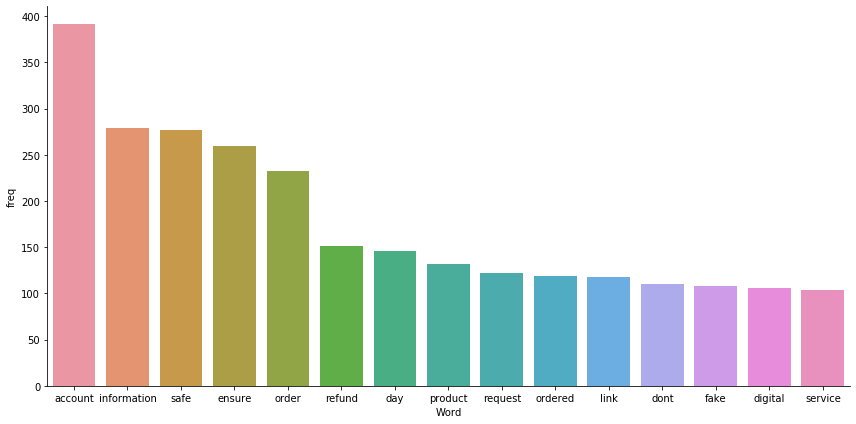

In [98]:
import seaborn as sns
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w1)

In [99]:
text_1=data_1.text[3]
text_1

'ensure account information safe please start private message'

In [100]:
text_1 = " ".join(review for review in data_1.text)
print ("There are {} words in the combination of all review.".format(len(text_1)))

There are 107875 words in the combination of all review.


## WordCloud

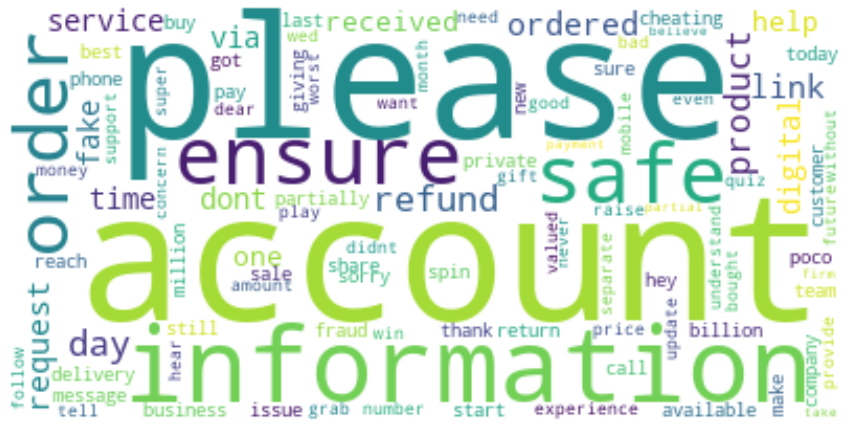

In [101]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud1 = WordCloud(background_color="white",mode="RGBA",max_words=100,collocations=False).generate(text_1)
plt.figure(figsize=[15,27])
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [102]:
new_search = "Snapdeal  -filter:retweets"

tweets_2 = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",since='2020-04-01').items(3000)

In [103]:
users_locs_2 = [[tweet.user.screen_name, tweet.user.location,tweet.source,tweet.place,tweet.created_at,tweet.user.geo_enabled,tweet.user.friends_count,tweet.text,tweet.retweet_count,tweet.retweeted] for tweet in tweets_2]

In [104]:
tweet_text3 = pd.DataFrame(data=users_locs_2, 
                    columns=['user', "location","source","place","created_at","geo_enabled","friends_count",
                             "text","retweet_count","retweeted_status"])
tweet_text3

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,SojitraHardik,India,Twitter for iPhone,None,2020-12-04 12:03:16,True,866,"@jaivardhan88 @entrackr May be just me, but I ...",0,False
1,Snapdeal_Help,India,OneDirect Suite - P,None,2020-12-04 11:45:59,False,1419,"@prkeshri Please ""Private Message"" us your con...",0,False
2,prkeshri,"Gurgaon, Haryana",Twitter for Android,None,2020-12-04 11:44:28,False,47,@Snapdeal_Help I will be complaining to the cy...,0,False
3,indistart,"Bengaluru, India",Tweet Old Post,None,2020-12-04 08:49:04,False,436,#Snapdeal Appoints Anup Vikal from #Aircel as ...,0,False
4,Snapdeal_Help,India,OneDirect Suite - P,None,2020-12-04 08:43:19,False,1419,@vineetkhicha Please PRIVATE MESSAGE us your s...,0,False
...,...,...,...,...,...,...,...,...,...,...
470,sumantamay,"Bardhaman, India",Twitter Web App,None,2020-11-25 04:14:23,False,128,@DrGauravGarg4 If govt really want to hurt Chi...,0,False
471,ETRetail,"New Delhi, India",econ b2b post,None,2020-11-25 04:00:07,True,168,ETRetail | Bureau of Indian Standards to bring...,0,False
472,VimalKumarPatil,"Bengaluru, India",Twitter for Android,None,2020-11-25 02:40:52,True,114,@dhruv_rathee Copycat business models don't wo...,0,False
473,Snapdeal_Help,India,OneDirect Suite - P,None,2020-11-25 00:35:55,False,1419,@pkesh2004 Our team got in touch with you and ...,0,False


In [105]:
data_2=pd.DataFrame(tweet_text3.text)
data_2.head()

,text
0,"@jaivardhan88 @entrackr May be just me, but I ..."
1,"@prkeshri Please ""Private Message"" us your con..."
2,@Snapdeal_Help I will be complaining to the cy...
3,#Snapdeal Appoints Anup Vikal from #Aircel as ...
4,@vineetkhicha Please PRIVATE MESSAGE us your s...


In [106]:
data_2.iloc[2,0]

'@Snapdeal_Help I will be complaining to the cyber police on the matter and against snapdeal. @snapdeal'

## To remove the Ascent letter

In [107]:
data_2['text'] = (data_2['text'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space
                              .replace(characterMap, regex=True) ### used to find pattern n replace
                              .str.normalize('NFKD') ### never skip the letter
                              .str.encode('ascii', errors='ignore') # convert in programming language & not readable for human
                              .str.decode('utf-8')) # is to convert into read able format for machine & human

In [109]:
data_2.iloc[3,0]

'#Snapdeal Appoints Anup Vikal from #Aircel as #CFO #StartUp https://t.co/kQw3TICnKA'

# Converted to Lower

In [110]:
data_2.text=data_2.text.str.lower()

In [111]:
data_2.iloc[1,0]

'@prkeshri please "private message" us your contact no. by clicking on the link given below and we\'ll get in touch w... https://t.co/fdyx6vvjjv'

In [112]:
data_2.iloc[3,0]

'#snapdeal appoints anup vikal from #aircel as #cfo #startup https://t.co/kqw3ticnka'

## Removing Url

In [113]:
data_2['text'] = data_2['text'].str.replace(r'http\S+|www.\S+','',case=False)
data_2.iloc[3,0]

'#snapdeal appoints anup vikal from #aircel as #cfo #startup '

# Remove punctuation

In [114]:
data_2['text']=data_2['text'].apply(lambda x : remove_punctuation(x))

In [115]:
data_2.iloc[1,0]

'prkeshri please private message us your contact no by clicking on the link given below and well get in touch w '

# Remove Number

In [116]:
data_2['text'] = data_2['text'].str.replace('\d+', '')

In [117]:
data_2.iloc[5,0]

'snapdealhelp snapdeasellers snapdeal not only our money has been taken they are not replying back on our queri '

# Removing Stop Words

In [118]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data_2['text'] = data_2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [119]:
data_2.iloc[5,0]

'snapdealhelp snapdeasellers snapdeal money taken replying back queri'

# Replace the similar code

In [120]:
text_2=data_2.text[0]
text_2

'jaivardhan entrackr may feel mobikwik like snapdeal many notice see'

In [121]:
# Apply a second round of cleaning
def clean_text_round2(text_2):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text_2 =  re.sub('please|pls', '', text_2)  ## Remove common words
    text_2 =  re.sub(r"\b[a-zA-Z]\b", "", text_2) # search for single letter then replace
    text_2 =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text_2) # search for combination of capital or small of 2 digit then replace  
    text_2 =  re.sub("[^a-zA-Z]"," ",text_2)# Search for all non-letters # Replace all non-letters with spaces
    text_2 =  " ".join(w for w in nltk.wordpunct_tokenize(text_2) if w.lower() in words or not w.isalpha())  # vlookup for checking alphabet    text =  re.sub(r' +', ' ',text) # #Check if the string has any + characters
    return text_2

round_3 = lambda x: clean_text_round2(x)

In [122]:
data_2.iloc[0,0]

'jaivardhan entrackr may feel mobikwik like snapdeal many notice see'

In [123]:
# Let's take a look at the updated text
data_2 = pd.DataFrame(data_2.text.apply(round_3))
data_2.iloc[0,0]

'may feel like many notice see'

# lemmatization 

In [124]:
def lemmatize_text(text_2):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text_2)]

In [125]:
data_2.head()

,text
0,may feel like many notice see
1,private message contact link given well get touch
2,police matter
3,
4,private message seller link give


In [126]:
data_2.iloc[3,0]

''

In [127]:
data_2['text'] = data_2.text.apply(lemmatize_text)
data_2.head()

,text
0,"[may, feel, like, many, notice, see]"
1,"[private, message, contact, link, given, well,..."
2,"[police, matter]"
3,[]
4,"[private, message, seller, link, give]"


In [128]:
data_2['text'] = data_2.text.apply(' '.join)
data_2.head()

,text
0,may feel like many notice see
1,private message contact link given well get touch
2,police matter
3,
4,private message seller link give


### Strip extra whitespace

In [129]:
data_2['text'] = (data_2['text'].astype("str")
                              .str.rstrip())
data_2.head()

,text
0,may feel like many notice see
1,private message contact link given well get touch
2,police matter
3,
4,private message seller link give


### Document-Term Matrix

In [130]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_2_cv = cv.fit_transform(data_2.text) # matrix 
data_2_dtm = pd.DataFrame(data_2_cv.toarray(), columns=cv.get_feature_names()) # dataframe
# One of the required inputs is a term-document matrix
tdm_2 = data_2_dtm.transpose()
tdm_2.head()

,0,1,2,3,4,5,6,7,8,9,...,465,466,467,468,469,470,471,472,473,474
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accommodating,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
account,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acquired,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
tdm_2['freq'] = tdm_2.sum(axis=1)

In [132]:
tdm_2.reset_index(inplace=True)
tdm_2.head()

,index,0,1,2,3,4,5,6,7,8,...,466,467,468,469,470,471,472,473,474,freq
0,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,abuse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,accommodating,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,account,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,acquired,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [133]:
tdm3=tdm_2[["index","freq"]]
tdm3.rename(columns = {'index':'Word'}, inplace = True)
tdm3.sort_values(by='freq',ascending=False,inplace=True)

C:\Users\TERMINATOR\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\TERMINATOR\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
tdm3.head(20)

,Word,freq
716,thanks,62
467,order,45
709,team,39
431,message,34
526,private,34
635,share,32
536,provide,25
297,good,23
247,experience,22
667,sorry,21


In [135]:
w2 = tdm3[tdm3['freq'] >=20] 
w2

,Word,freq
716,thanks,62
467,order,45
709,team,39
431,message,34
526,private,34
635,share,32
536,provide,25
297,good,23
247,experience,22
667,sorry,21


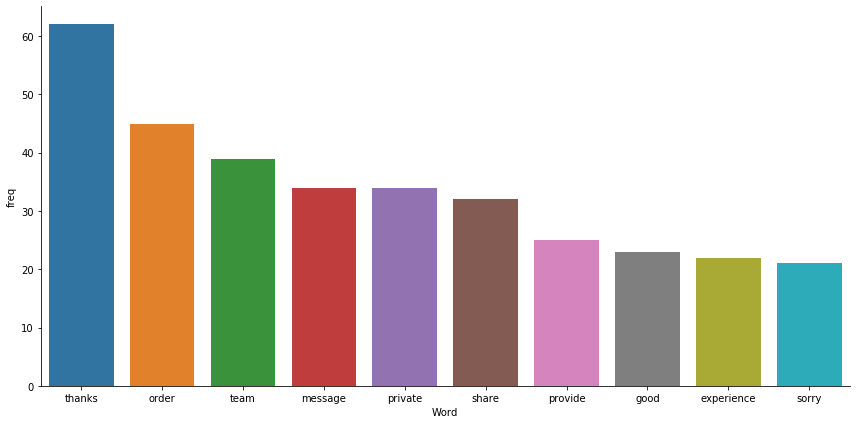

In [136]:
import seaborn as sns
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w2)

In [139]:
text_2=data_2.text[1]
text_2

'private message contact link given well get touch'

In [140]:
text_2 = " ".join(review for review in data_2.text)
print ("There are {} words in the combination of all review.".format(len(text_2)))

There are 17359 words in the combination of all review.


## WordCloud

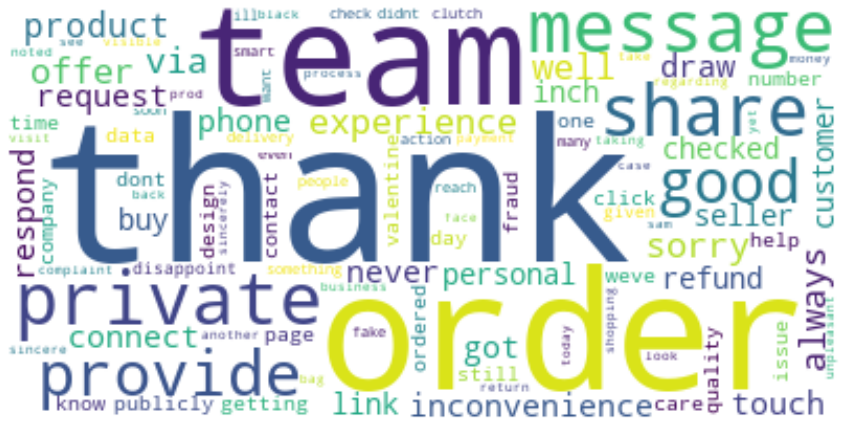

In [141]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud2 = WordCloud(background_color="white",mode="RGBA",max_words=100,collocations=False).generate(text_2)
plt.figure(figsize=[15,27])
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

# Amazon Sentiment Analysis

In [142]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
data['polarity'] = data['text'].apply(pol)
data.head(5)

,text,polarity
0,hey stop contact data dont like pretty sure,0.375000
1,eligible lucky draw hope list,0.333333
2,wrong old product order dell inch,-0.200000
3,buy get phone next day today said post order d...,0.000000
4,complete available shop,0.250000


In [143]:
data['Sentiment'] = np.where(data['polarity']>=0, 'Positive', 'Negative')

In [144]:
data.head()

,text,polarity,Sentiment
0,hey stop contact data dont like pretty sure,0.375000,Positive
1,eligible lucky draw hope list,0.333333,Positive
2,wrong old product order dell inch,-0.200000,Negative
3,buy get phone next day today said post order d...,0.000000,Positive
4,complete available shop,0.250000,Positive


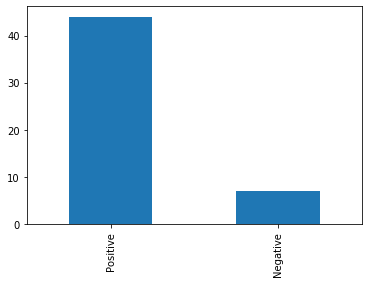

In [145]:
data.Sentiment.value_counts().plot.bar()

In [146]:
data.Sentiment.value_counts()

Positive    44
Negative     7
Name: Sentiment, dtype: int64

In [147]:
data['Sentiment2'] = np.where(data.polarity< 0, 'Negative',
                           np.where(data.polarity> 0,'Positve', 'Neutral'))

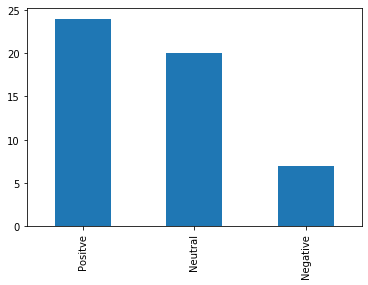

In [148]:
data.Sentiment2.value_counts().plot.bar()

# Flipkart Sentiment Analysis

In [157]:
pol = lambda x: TextBlob(x).sentiment.polarity
data_1['polarity'] = data_1['text'].apply(pol)
data_1.head(5)

,text,polarity
0,way product didnt expect,0.00
1,ordered rover people,0.00
2,help order,0.00
3,ensure account information safe please start p...,0.25
4,gud local shopping,0.00


In [158]:
data_1['Sentiment'] = np.where(data_1.polarity< 0, 'Negative',
                           np.where(data_1.polarity> 0,'Positve', 'Neutral'))

In [159]:
data_1.head(10)

,text,polarity,Sentiment
0,way product didnt expect,0.000000,Neutral
1,ordered rover people,0.000000,Neutral
2,help order,0.000000,Neutral
3,ensure account information safe please start p...,0.250000,Positve
4,gud local shopping,0.000000,Neutral
5,thanks help opening fraud given fake,-0.150000,Negative
6,work day tight schedule whats use service like,-0.178571,Negative
7,,0.000000,Neutral
8,fake information given check detail tweet dear...,-0.500000,Negative
9,bad support service travel many time issue still,-0.100000,Negative


In [160]:
data_1.Sentiment.value_counts()

Neutral     1411
Positve      957
Negative     632
Name: Sentiment, dtype: int64

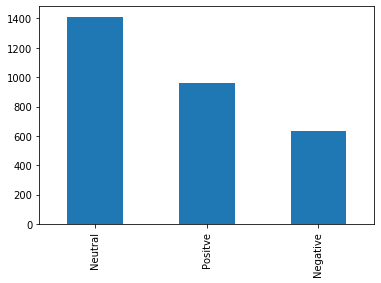

In [161]:
data_1.Sentiment.value_counts().plot.bar()

# Snapdeal Sentiment Analysis

In [162]:
pol = lambda x: TextBlob(x).sentiment.polarity
data_2['polarity'] = data_2['text'].apply(pol)
data_2.head(5)

,text,polarity
0,may feel like many notice see,0.5
1,private message contact link given well get touch,0.0
2,police matter,0.0
3,,0.0
4,private message seller link give,0.0


In [163]:
data_2['Sentiment'] = np.where(data_2.polarity< 0, 'Negative',
                           np.where(data_2.polarity> 0,'Positve', 'Neutral'))

In [164]:
data_2.head(10)

,text,polarity,Sentiment
0,may feel like many notice see,0.500000,Positve
1,private message contact link given well get touch,0.000000,Neutral
2,police matter,0.000000,Neutral
3,,0.000000,Neutral
4,private message seller link give,0.000000,Neutral
5,money taken back,0.000000,Neutral
6,inconvenience share seller via private message,0.000000,Neutral
7,taking ride without intimation fee,0.000000,Neutral
8,offer click,0.000000,Neutral
9,black offer click photography,-0.166667,Negative


In [165]:
data_2.Sentiment.value_counts()

Neutral     236
Positve     156
Negative     83
Name: Sentiment, dtype: int64

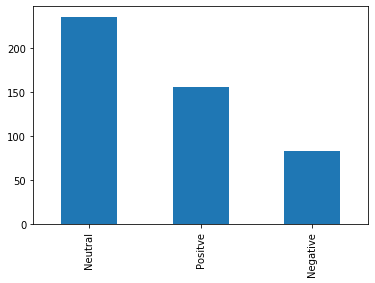

In [166]:
data_2.Sentiment.value_counts().plot.bar()